<a href="https://colab.research.google.com/github/Stepeech/DataMining/blob/main/4_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_(Matplotlib_Seaborn_Pandas)_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика. Визуальный анализ данных (Matplotlib/Seaborn/Pandas). Часть 2


1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/3.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Matplotlib_Seaborn_Plotly.ipynb)
- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colab = True # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [3]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/StudentsPerformance.csv')
else:
    df = pd.read_csv("../../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


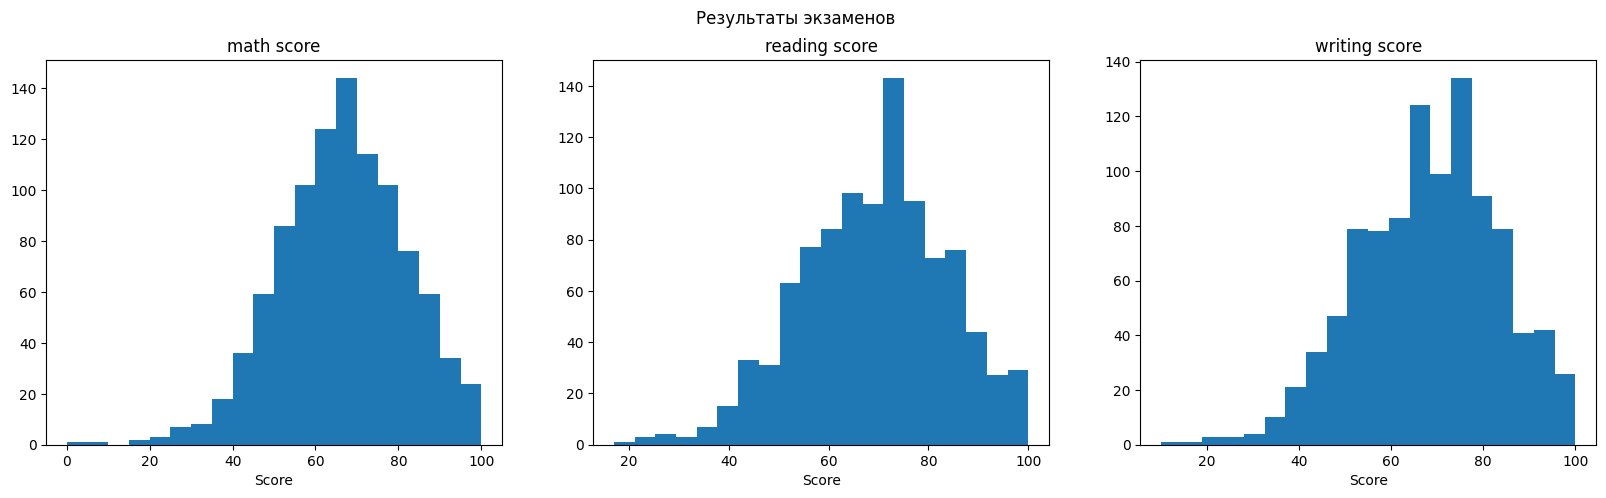

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

subjects = ['math score', 'reading score', 'writing score']

for i, subject in enumerate(subjects):
    ax = axes[i]
    ax.hist(df[subject], bins=20)
    ax.set_title(subject)
    ax.set_xlabel('Score')

plt.suptitle('Результаты экзаменов')

plt.show()

In [ ]:
print(f"Медианное значение по математике: {df['math score'].median()}")
print(f"Медианное значение по чтению: {df['reading score'].median()}")
print(f"Медианное значение по письму: {df['writing score'].median()}")

Медианное значение по математике: 66.0
Медианное значение по чтению: 70.0
Медианное значение по письму: 69.0


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64


<ipython-input-11-73fa317fcd6d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('parental level of education').mean()['math score'].plot(kind='bar')


<Axes: xlabel='parental level of education'>

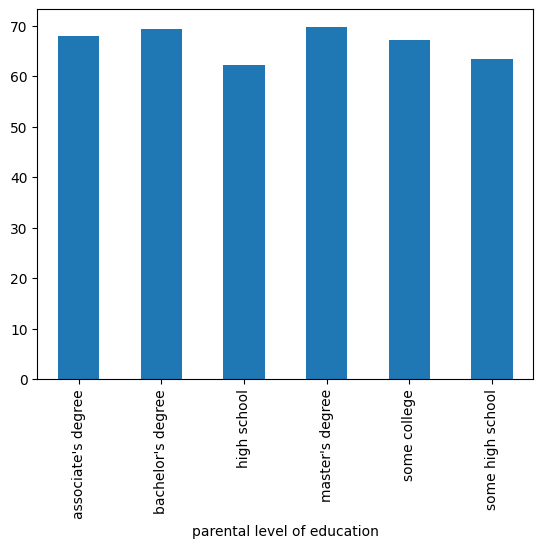

In [11]:
print(df.groupby('parental level of education').size())

df.groupby('parental level of education').mean()['math score'].plot(kind='bar')

# Баллы отличаются не сильно

#print(df[df['parental level of education'] == "high school"]['math score'].mean())

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [ ]:
len(df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90) & (df['gender'] == 'female')])


17

#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [ ]:
df.groupby('gender').agg({'math score': ['min', 'max', 'median'], 'reading score': ['min', 'max', 'median'], 'writing score': ['min', 'max', 'median']})

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [ ]:
df.groupby(['gender', 'lunch', 'test preparation course']).agg({'math score': 'mean','reading score': 'mean','writing score': 'mean'})
# Влияет в лучшую сторону

math score  reading score  \
gender lunch        test preparation course                              
female free/reduced completed                 60.785714      73.428571   
                    none                      52.890756      63.831933   
       standard     completed                 71.131579      79.798246   
                    none                      66.530233      73.386047   
male   free/reduced completed                 65.639344      65.786885   
                    none                      60.609524      59.076190   
       standard     completed                 75.955752      72.601770   
                    none                      69.832512      64.719212   

                                             writing score  
gender lunch        test preparation course                 
female free/reduced completed                    74.371429  
                    none                         61.781513  
       standard     completed                    81.508772  
                    none                         72.967442  
male   free/reduced completed                    65.737705  
                    none                         55.285714  
       standard     completed                    71.982301  
                    none                         61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

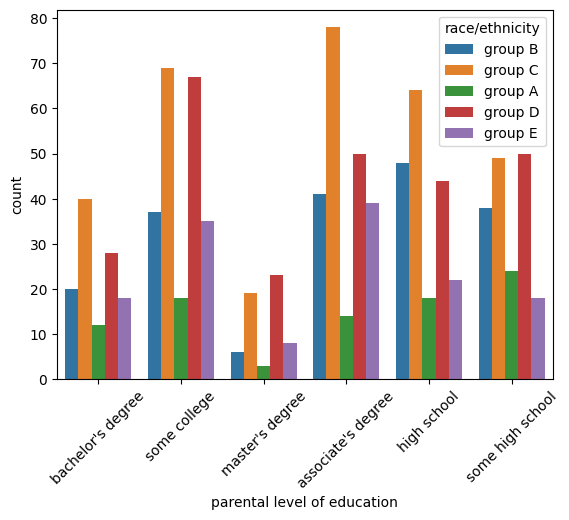

In [ ]:
plt.figure()
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity')
plt.xticks(rotation=45)

plt.legend(title='race/ethnicity')

plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

Ответ: дети, родители которых закончили только старшую школу

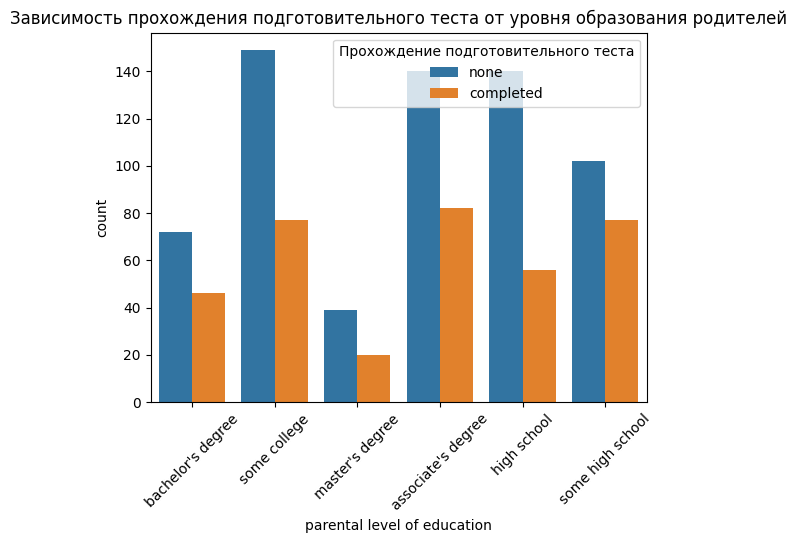

In [32]:
plt.figure()
sns.countplot(data=df, x='parental level of education', hue='test preparation course')
plt.xticks(rotation=45)
plt.title("Зависимость прохождения подготовительного теста от уровня образования родителей")

plt.legend(title='Прохождение подготовительного теста', loc='upper right')

plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

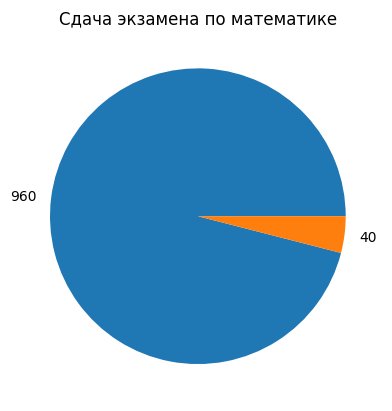

In [31]:
df['pass_math_exam'] = df['math score'] >= 40

counts = [df['pass_math_exam'].sum(), len(df) - df['pass_math_exam'].sum()]

plt.figure()
plt.pie(counts, labels=counts)
plt.title("Сдача экзамена по математике")

plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

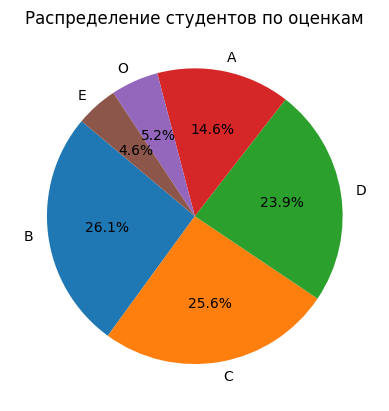

In [28]:
import numpy as np

df['avg'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def get_grade(avg):
    if avg < 40:
        return 'E'
    elif 40 <= avg < 60:
        return 'D'
    elif 60 <= avg < 70:
        return 'C'
    elif 70 <= avg < 80:
        return 'B'
    elif 80 <= avg < 90:
        return 'A'
    else:
        return 'O'

df['grade'] = np.where(df['math score'] < 40, "E", df['avg'].apply(get_grade))

grade_counts = df['grade'].value_counts()

labels = grade_counts.index
counts = grade_counts.values

plt.figure()
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Распределение студентов по оценкам")

plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

Ответ: женского

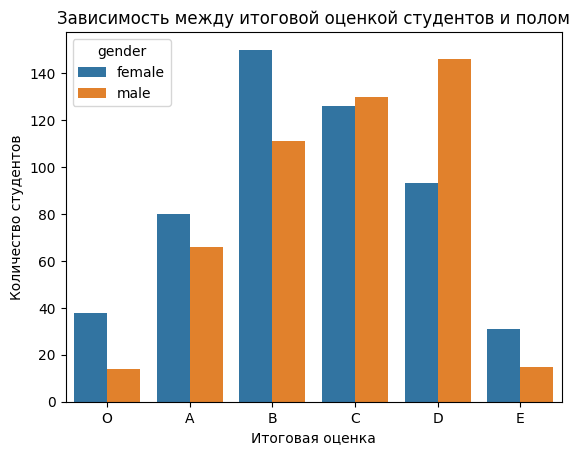

In [30]:
plt.figure()
sns.countplot(data=df, x='grade', hue='gender', order=['O', 'A', 'B', 'C', 'D', 'E'])
plt.title("Зависимость между итоговой оценкой студентов и полом")
plt.xlabel("Итоговая оценка")
plt.ylabel("Количество студентов")

plt.show()